In [1]:
install.packages('ISLR')
library(ISLR)
attach(Wage)

Installing package into 'C:/Users/idsoo/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsoo\AppData\Local\Temp\RtmpOkylyp\downloaded_packages


## Polynomial Model

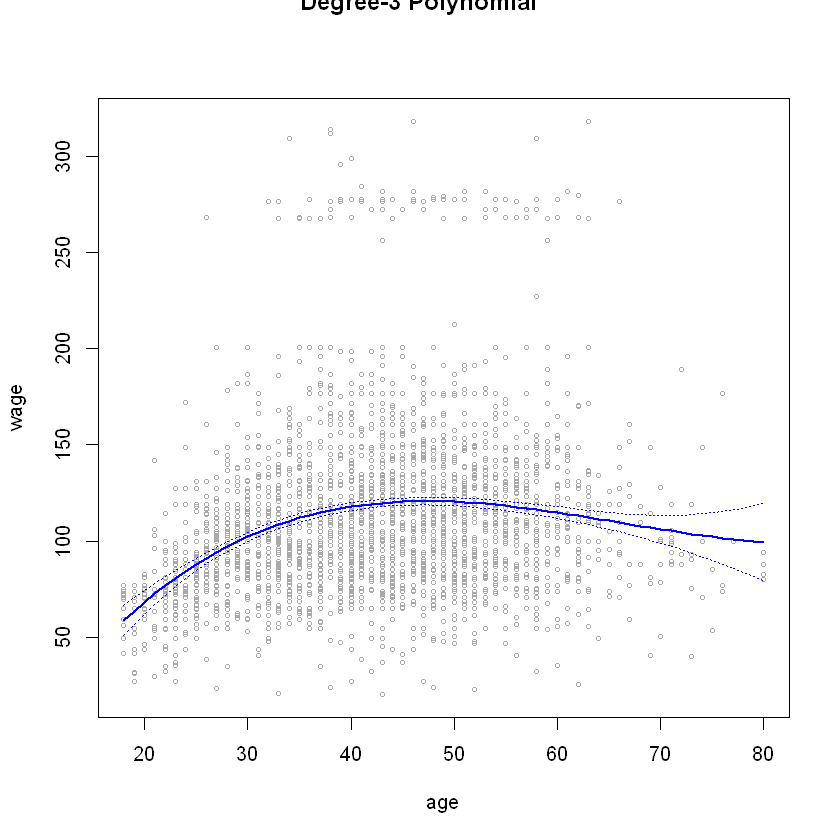

In [2]:
fit.3=lm(wage~poly(age,3),data=Wage)
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit.3,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-3 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

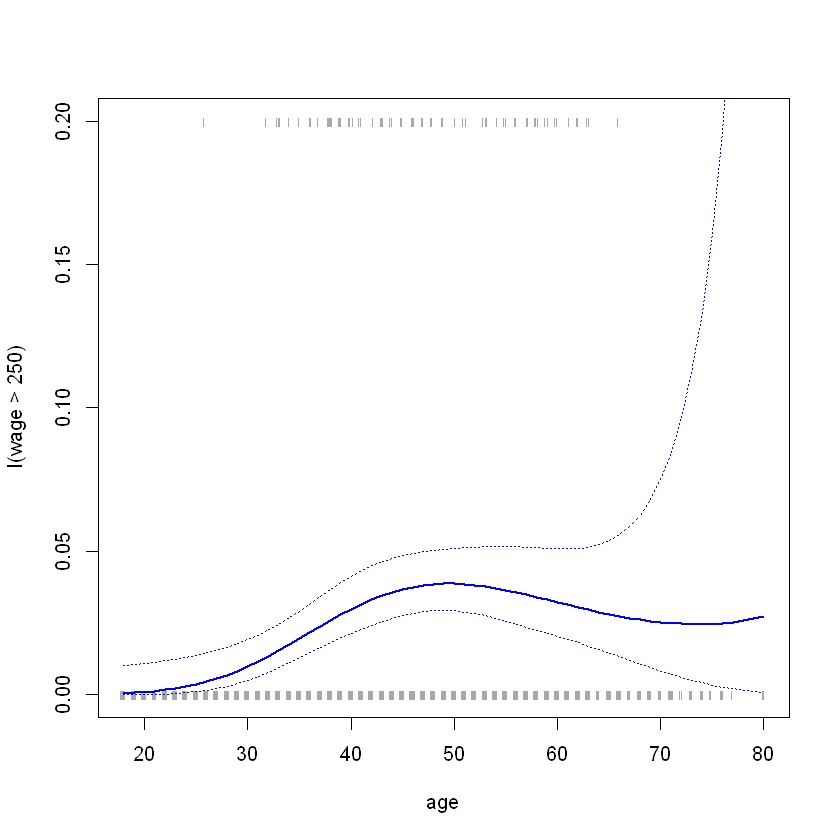

In [3]:
fit=glm(I(wage>250)~poly(age,3),data=Wage,family=binomial)
preds=predict(fit,newdata=list(age=age.grid),se=T)
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))
preds=predict(fit,newdata=list(age=age.grid),type="response",se=T)
plot(age,I(wage>250),xlim=agelims,type="n",ylim=c(0,.2))
points(jitter(age), I((wage>250)/5),cex=.5,pch="|",col="darkgrey")
lines(age.grid,pfit,lwd=2, col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

## Cubic spline model

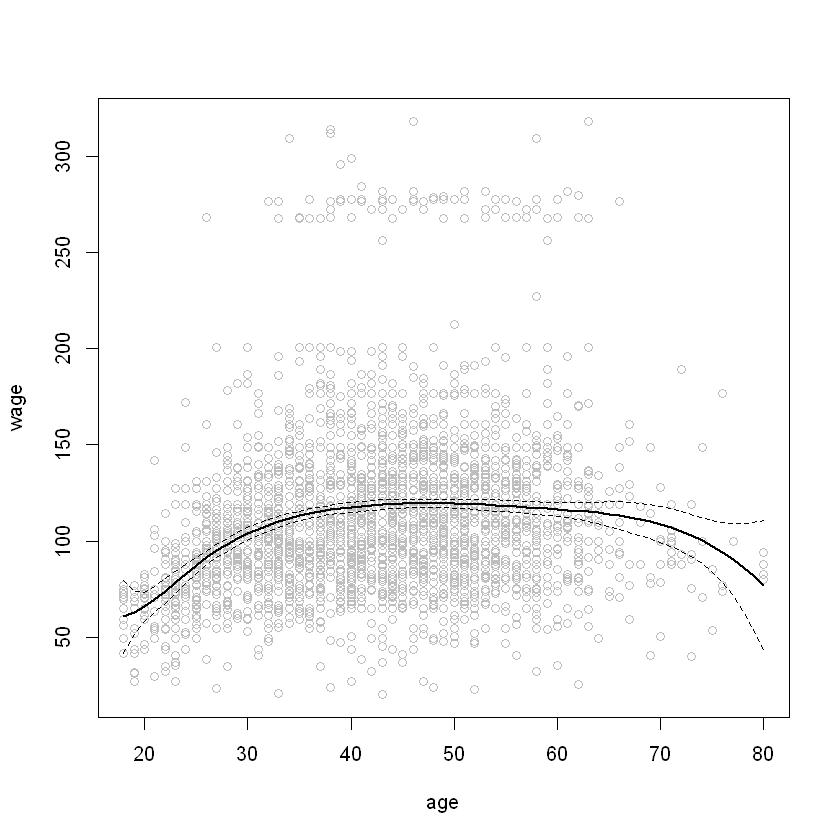

In [4]:
library(splines)
fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
pred=predict(fit,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se,lty="dashed")
lines(age.grid,pred$fit-2*pred$se,lty="dashed")

In [5]:
summary(fit)


Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

## Natural spline model

In [7]:
fit2=lm(wage~ns(age,df=4),data=Wage)


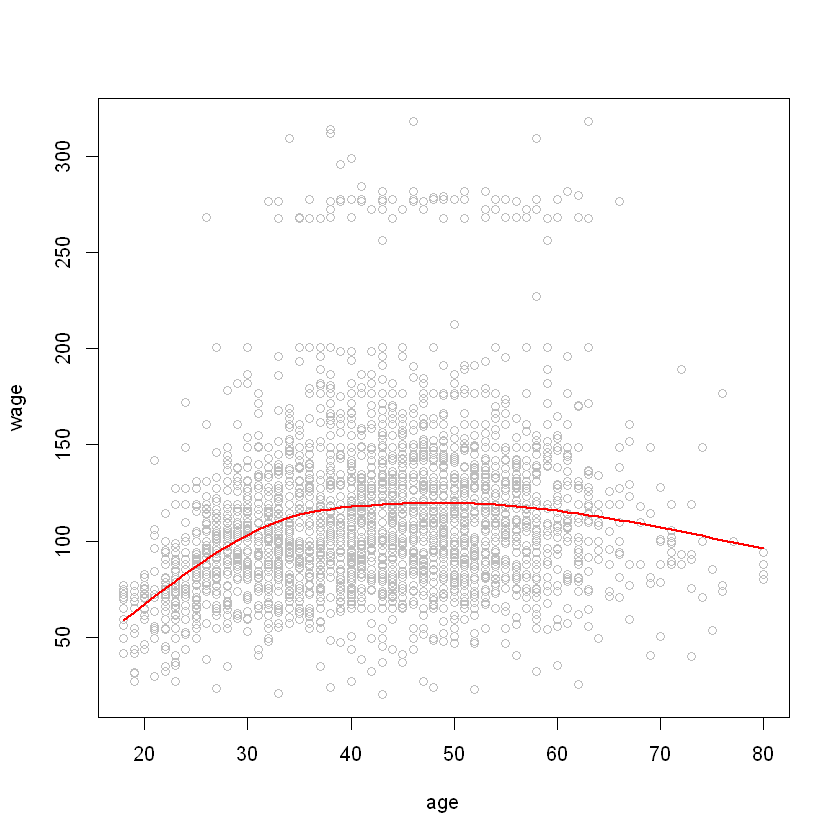

In [10]:
pred2=predict(fit2,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid, pred2$fit,col="red",lwd=2)

In [9]:
summary(fit2)


Call:
lm(formula = wage ~ ns(age, df = 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.737 -24.477  -5.083  15.371 204.874 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        58.556      4.235  13.827   <2e-16 ***
ns(age, df = 4)1   60.462      4.190  14.430   <2e-16 ***
ns(age, df = 4)2   41.963      4.372   9.597   <2e-16 ***
ns(age, df = 4)3   97.020     10.386   9.341   <2e-16 ***
ns(age, df = 4)4    9.773      8.657   1.129    0.259    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2995 degrees of freedom
Multiple R-squared:  0.08598,	Adjusted R-squared:  0.08476 
F-statistic: 70.43 on 4 and 2995 DF,  p-value: < 2.2e-16


## Smoothing spline

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

[1] 6.794596

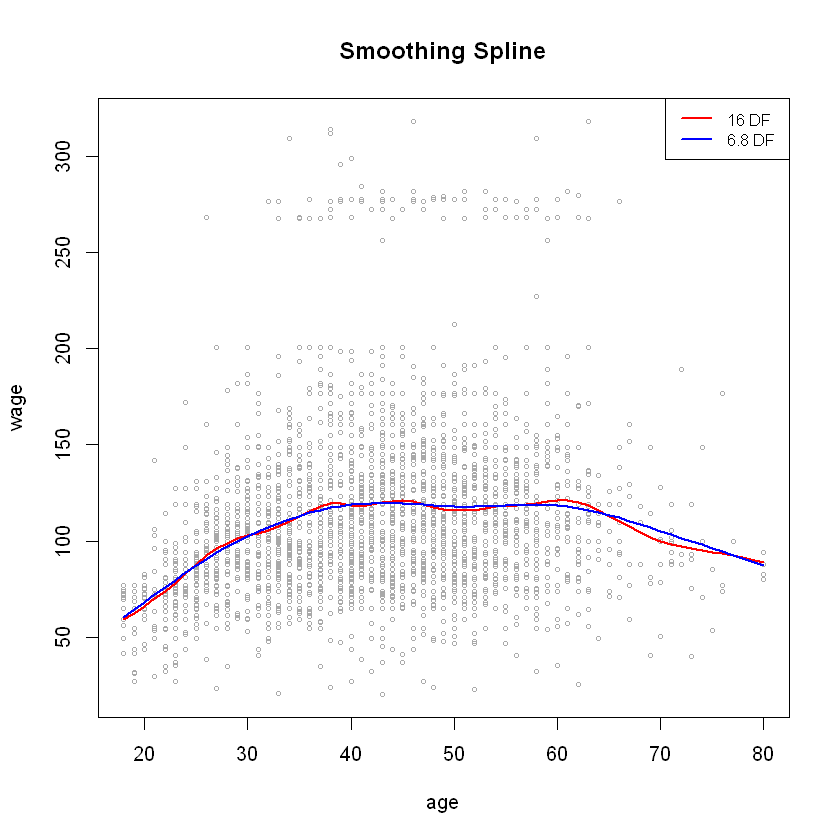

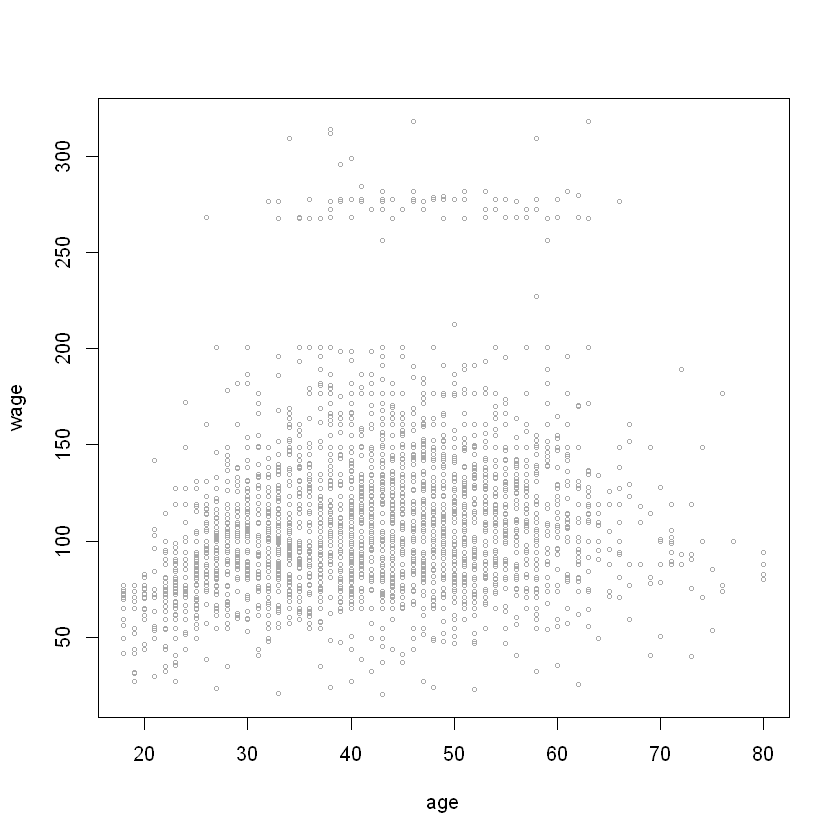

In [11]:
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Smoothing Spline")
fit=smooth.spline(age,wage,df=16)
fit2=smooth.spline(age,wage,cv=TRUE)
fit2$df
lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)
legend("topright",legend=c("16 DF","6.8 DF"),col=c("red","blue"),lty=1,lwd=2,cex=.8)
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")

## Local Regression

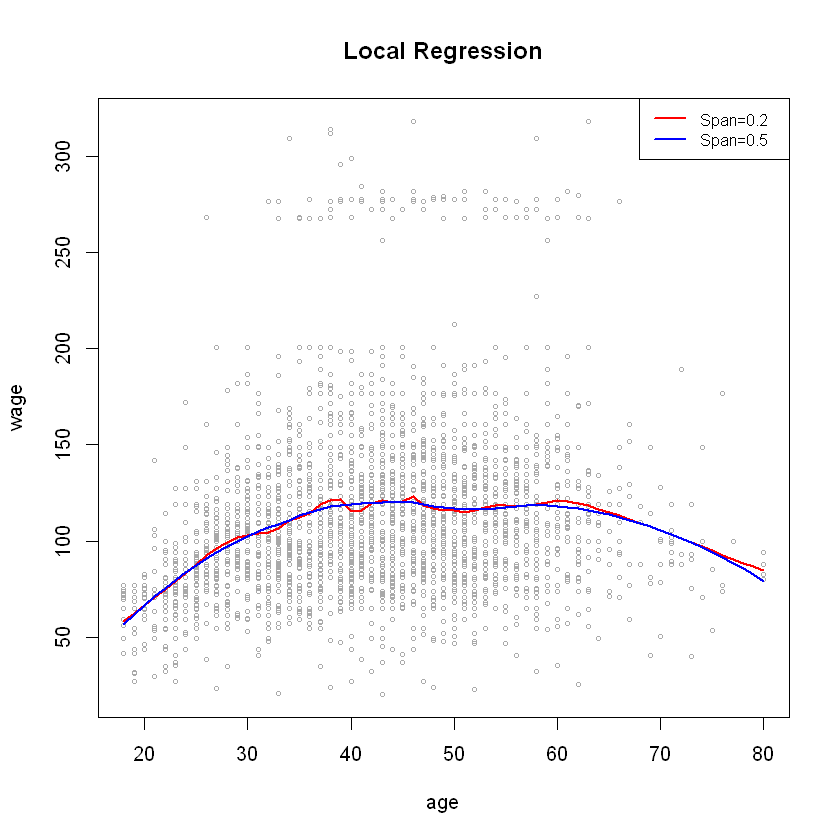

In [15]:
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Local Regression")
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)),col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

## Natural spline GAM

In [16]:
gam1=lm(wage~ns(year,4)+ns(age,5)+education,data=Wage)

In [17]:
summary(gam1)


Call:
lm(formula = wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.513  -19.608   -3.583   14.112  214.535 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   46.949      4.704   9.980  < 2e-16 ***
ns(year, 4)1                   8.625      3.466   2.488  0.01289 *  
ns(year, 4)2                   3.762      2.959   1.271  0.20369    
ns(year, 4)3                   8.127      4.211   1.930  0.05375 .  
ns(year, 4)4                   6.806      2.397   2.840  0.00455 ** 
ns(age, 5)1                   45.170      4.193  10.771  < 2e-16 ***
ns(age, 5)2                   38.450      5.076   7.575 4.78e-14 ***
ns(age, 5)3                   34.239      4.383   7.813 7.69e-15 ***
ns(age, 5)4                   48.678     10.572   4.605 4.31e-06 ***
ns(age, 5)5                    6.557      8.367   0.784  0.43328    
education2. HS Grad           10.983      2.

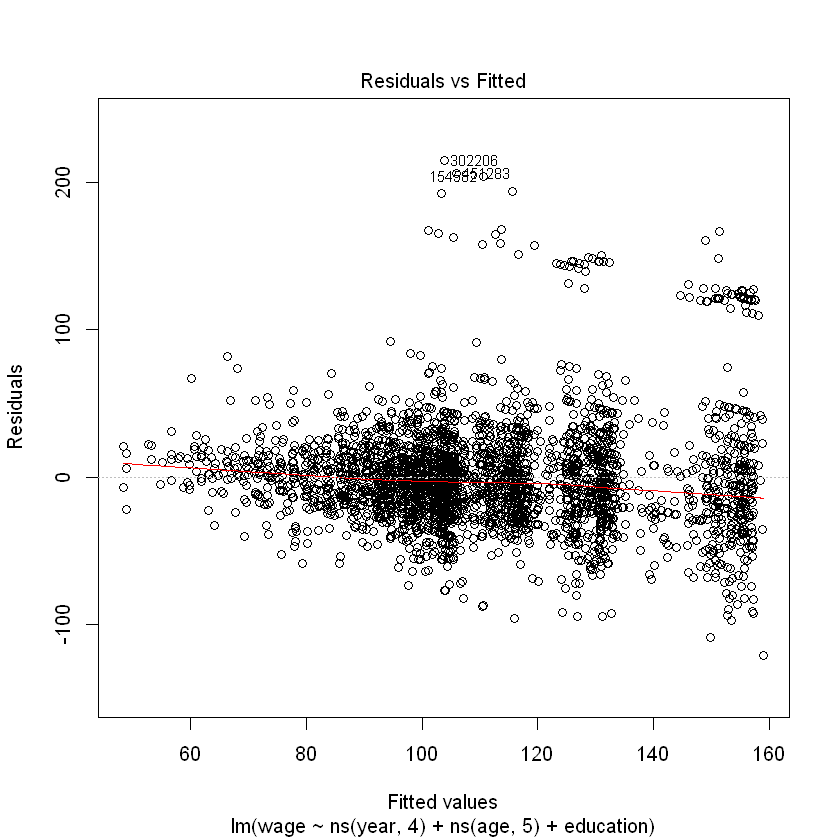

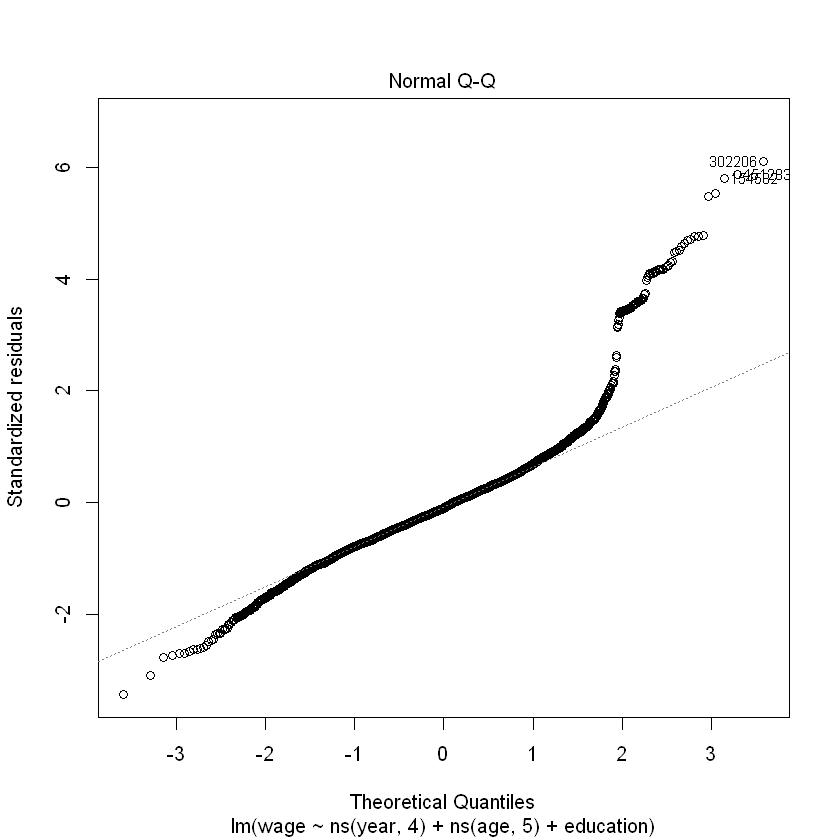

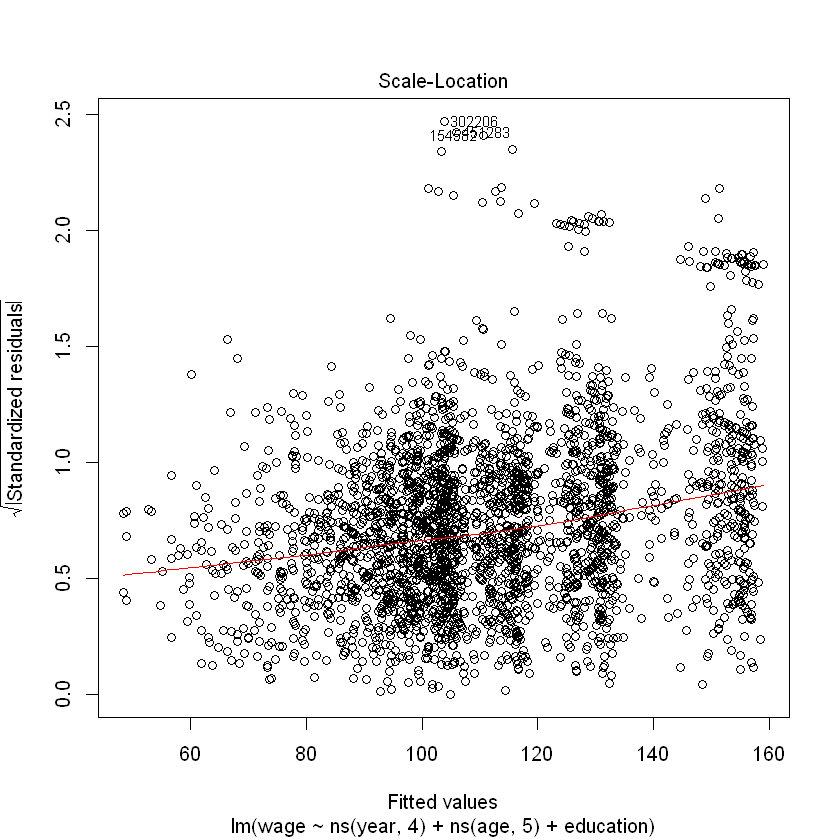

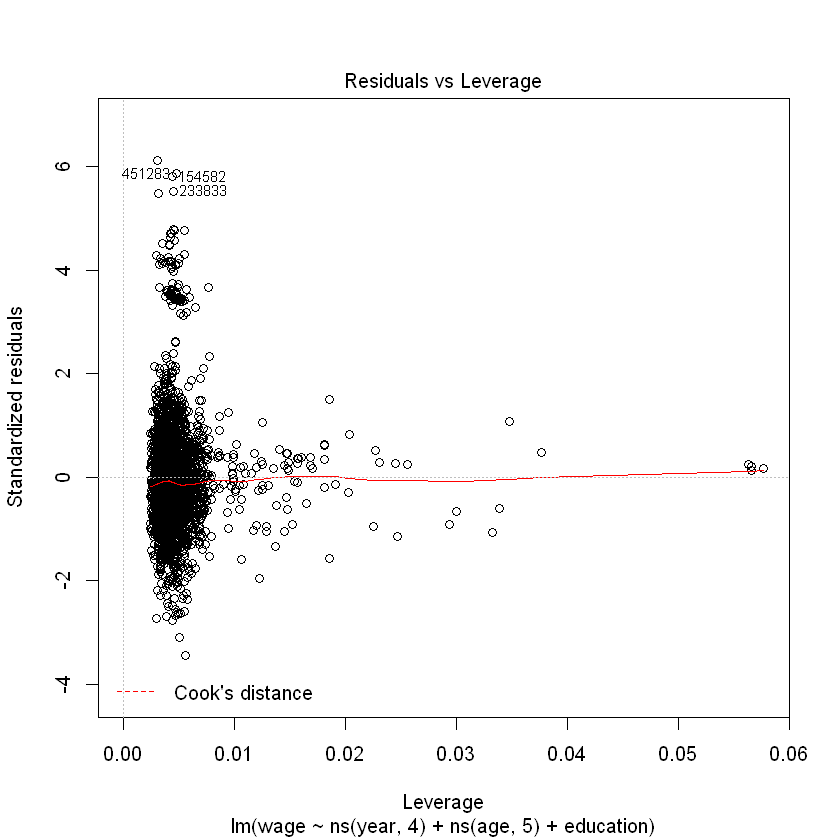

In [23]:
plot(gam1)

## Smoothing spline GAM

In [19]:
install.packages('gam')

Installing package into 'C:/Users/idsoo/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsoo\AppData\Local\Temp\RtmpOkylyp\downloaded_packages


Loading required package: foreach
Loaded gam 1.14-4



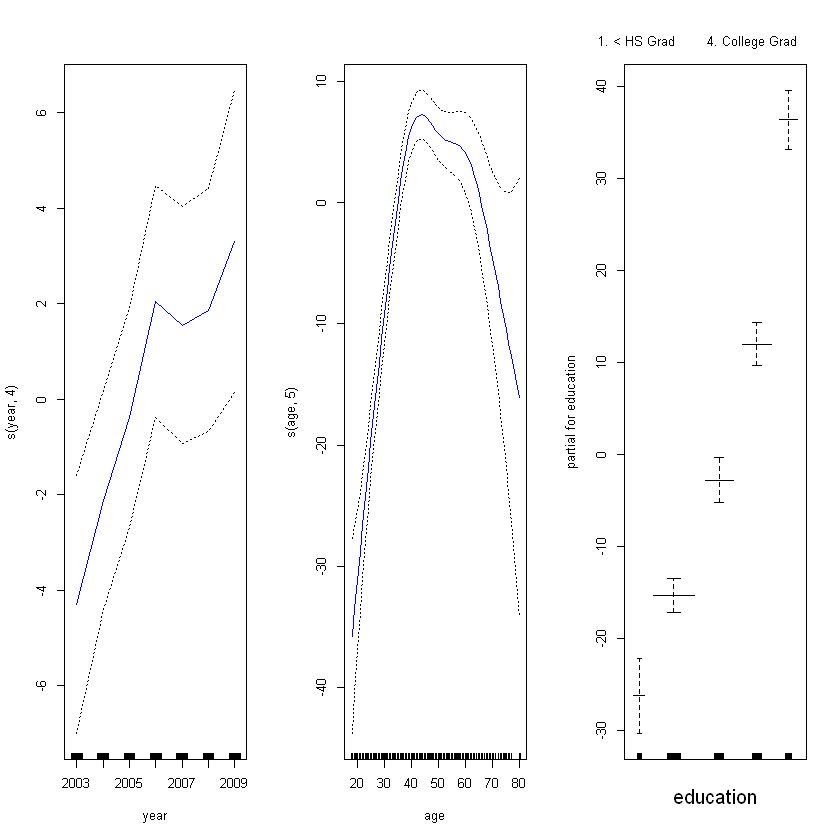

In [20]:
library(gam)
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)
preds=predict(gam.m2,newdata=Wage)

## Local regression GAM

In [30]:
install.packages('akima')

Installing package into 'C:/Users/idsoo/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependency 'sp'



package 'sp' successfully unpacked and MD5 sums checked
package 'akima' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsoo\AppData\Local\Temp\RtmpOkylyp\downloaded_packages


Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"

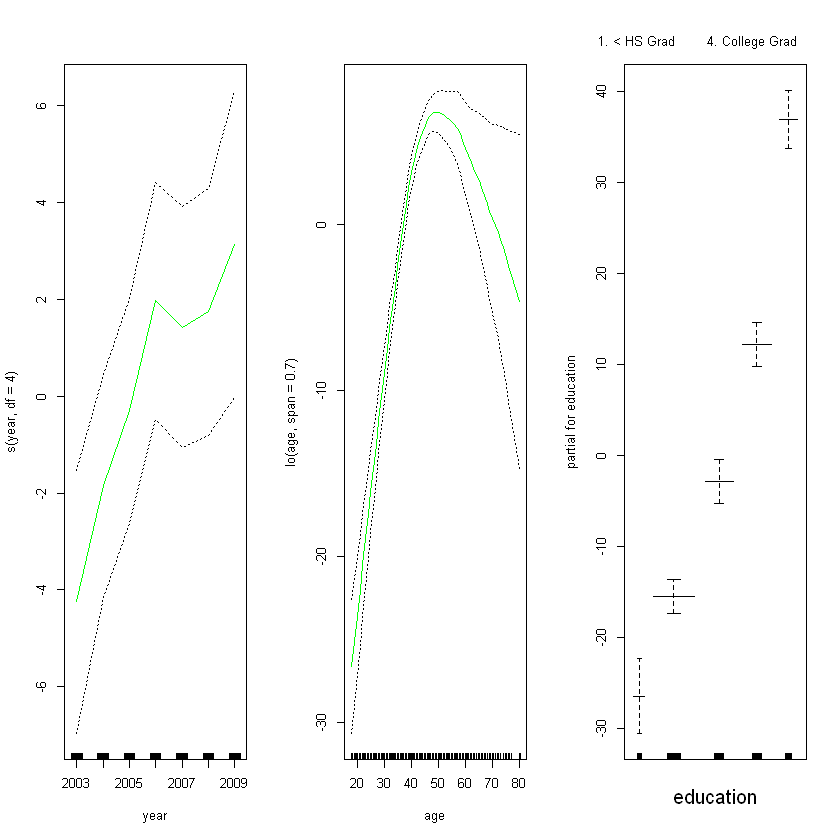

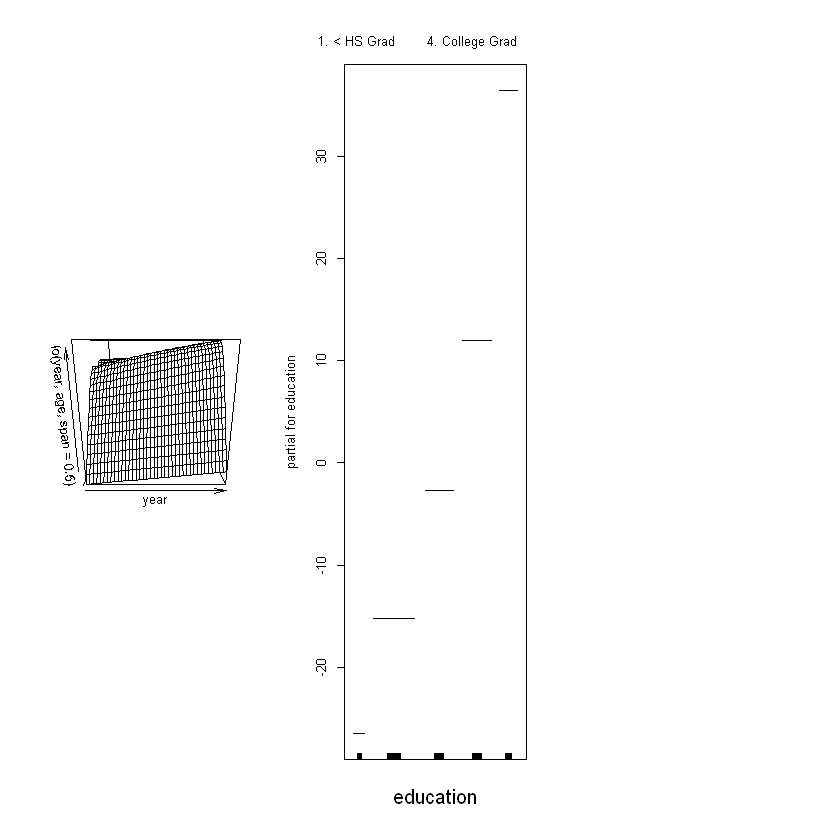

In [31]:
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam.lo, se=TRUE, col="green")
gam.lo.i=gam(wage~lo(year,age,span=0.5)+education,data=Wage)
library(akima)
plot(gam.lo.i)

## Logistic Regression GAM

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

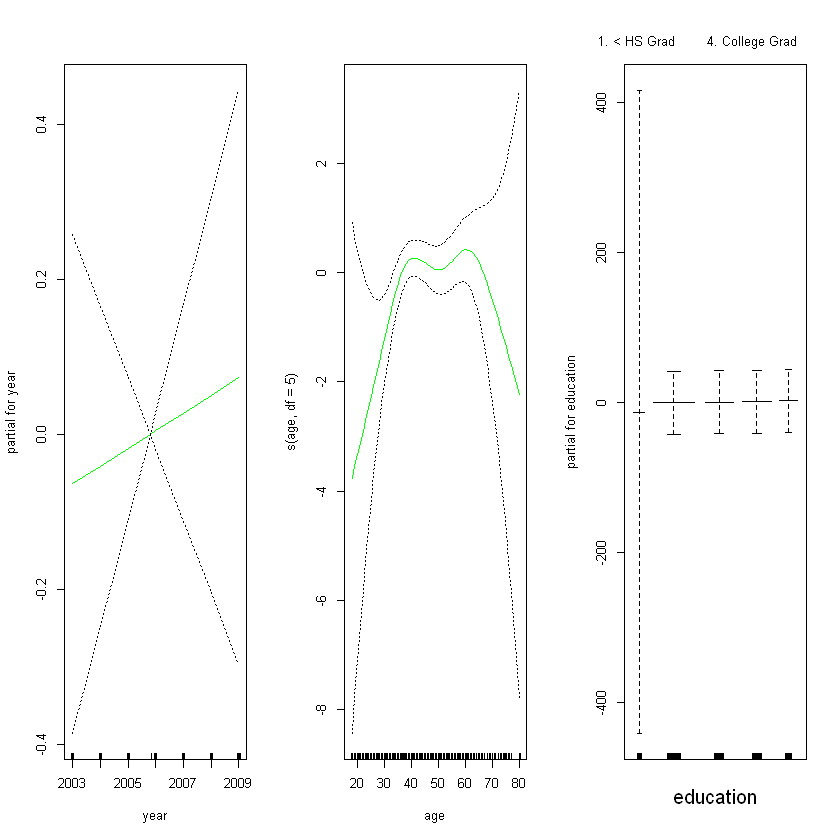

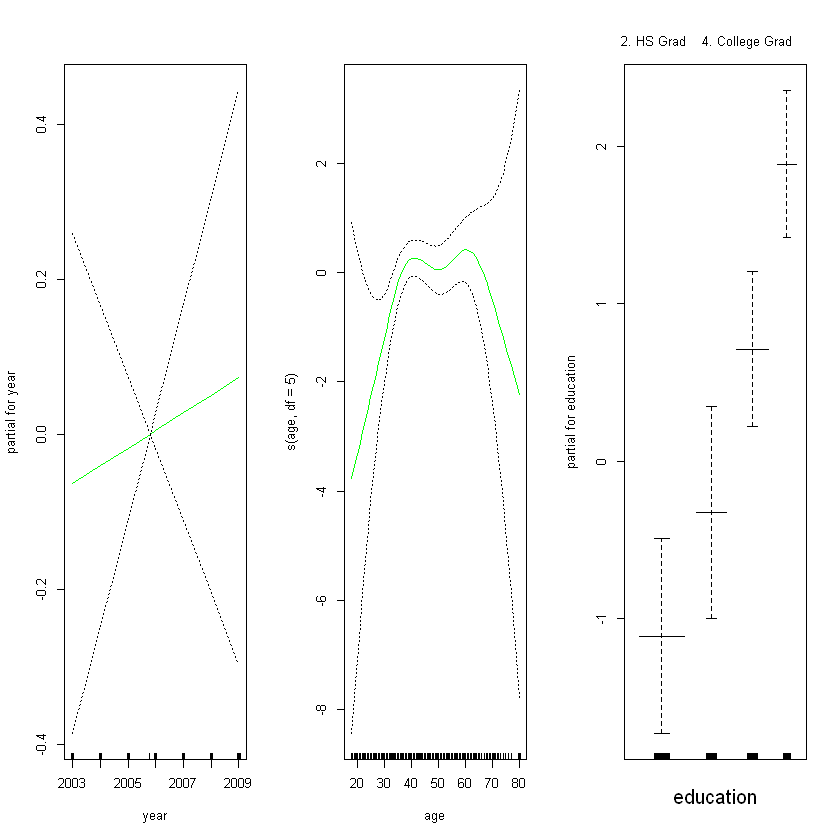

In [22]:
gam.lr=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage)
par(mfrow=c(1,3))
plot(gam.lr,se=T,col="green")
table(education,I(wage>250))
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage,subset=(education!="1. < HS Grad"))
plot(gam.lr.s,se=T,col="green")